<a href="https://colab.research.google.com/github/DiggsPapu/data-science/blob/main/Lab1DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Análisis Exploratorio, PCA y Apriori


In [ ]:
!pip install factor_analyzer
!pip install ydata-profiling
!pip install apyori

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 644.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=d482936ee17c9c2b727d5d6ae95550fb2389bbc21cf2095ef86e6f255a893ce0
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=15f99548a

In [ ]:
##librerias a importar
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport
import pandas as pd
from apyori import apriori

In [ ]:
##Leer archivo

data = pd.read_csv('/content/risk_factors_cervical_cancer.csv')
data.head()


# Reemplazar '?' por NaN
data.replace('?', np.nan, inplace=True)


# Convertir columnas a numéricas donde sea necesario
columns_to_convert = data.columns.drop(['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'])
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric)

# Estadísticas descriptivas
descriptive_stats = data.describe()
print("Estadísticas Descriptivas:")
print(descriptive_stats)

Estadísticas Descriptivas:
              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.2266

### Analisis Exploratorio

In [ ]:
profile = ProfileReport(data)
profile.to_file("AnalisisExploratorio.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def determinar_tipo_variable(datos):
    tipo_variable = None

    # Verificar si es una variable categórica
    if datos.dtype == 'object' or pd.api.types.is_categorical_dtype(datos):
        tipo_variable = "Categórica"
    # Verificar si es una variable cuantitativa continua
    elif pd.api.types.is_numeric_dtype(datos) and np.issubdtype(datos.dtype, np.floating):
        tipo_variable = "Cuantitativa Continua"
    # Verificar si es una variable cuantitativa discreta
    elif pd.api.types.is_numeric_dtype(datos) and np.issubdtype(datos.dtype, np.integer):
        tipo_variable = "Cuantitativa Discreta"

    return tipo_variable

for columna in data.columns:
    tipo = determinar_tipo_variable(data[columna])
    print(f"'{columna}' es: {tipo}")

NameError: name 'data' is not defined

In [ ]:


data = pd.read_csv('/content/risk_factors_cervical_cancer.csv')
# Reemplazar '?' por NaN
data.replace('?', np.nan, inplace=True)

# Mostrar cantidad de valores faltantes por variable antes de la limpieza
missing_values_before = data.isnull().sum()
print("Valores faltantes antes de la limpieza:")
print(missing_values_before)

# Eliminar columnas con más del 30% de valores faltantes
column_threshold = 0.3  # 30%
data = data.loc[:, data.isnull().mean() < column_threshold]


# Contar las filas antes de la limpieza
rows_before = data.shape[0]

# Convertir columnas a numéricas donde sea necesario
columns_to_convert = data.columns.drop(['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'])
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric)

# Imputar valores faltantes numéricos con la media
data.fillna(data.mean(), inplace=True)

# Imputar valores faltantes categóricos con la moda
for column in ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Eliminar filas con más de un cierto porcentaje de valores faltantes
threshold = 0.35  # 50%
data = data.dropna(thresh=int(threshold * data.shape[1]))

# Contar las filas después de la eliminación
rows_after = data.shape[0]
rows_removed = rows_before - rows_after
print(f"Filas eliminadas debido al umbral de valores faltantes: {rows_removed}")

# Eliminar columnas con más de un cierto porcentaje de valores faltantes
data = data.loc[:, data.isnull().mean() < threshold]

# Detectar y manejar outliers usando el método IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Convertir variables categóricas a tipo 'category'
categorical_columns = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
data[categorical_columns] = data[categorical_columns].astype('category')


Valores faltantes antes de la limpieza:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                            

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 347 non-null    int64   
 1   Number of sexual partners           347 non-null    float64 
 2   First sexual intercourse            347 non-null    float64 
 3   Num of pregnancies                  347 non-null    float64 
 4   Smokes                              347 non-null    float64 
 5   Smokes (years)                      347 non-null    float64 
 6   Smokes (packs/year)                 347 non-null    float64 
 7   Hormonal Contraceptives             347 non-null    float64 
 8   Hormonal Contraceptives (years)     347 non-null    float64 
 9   IUD                                 347 non-null    float64 
 10  IUD (years)                         347 non-null    float64 
 11  STDs                                3

In [ ]:
data = pd.read_csv('/content/risk_factors_cervical_cancer.csv')
data.info()

### Analisis de componentes principales

In [ ]:

# Matriz de correlación para evaluar las correlaciones entre variables numéricas
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '?'

Para la matriz de correlación observamos que claramente si hay correlación entre las varibales cuantitativas, entre las correlaciones podemos observar que existe una correlación entre el cancer y el diganostico de HPV

In [ ]:

data = pd.read_csv('risk_factors_cervical_cancer.csv', encoding = "ISO-8859-1")
data.head()
col = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
       'Smokes (years)', 'Hormonal Contraceptives (years)']
data[col] = data[col].replace('?', 0)
data[col] = data[col].astype(float)
#obtener las variables numericas
cuantitativas = data.select_dtypes(include=['int64', 'float64'])

In [ ]:
#test de esfeciridad
chi_cuadrado, p_valor = calculate_bartlett_sphericity(cuantitativas)
chi_cuadrado, p_valor

(4827.381497092612, 0.0)

El p-valor es menor que 0.05, por lo que se rechaza la hipótesis nula. Hay correlación entre las variables.

In [ ]:
#indice de KMO
kmo,kmo_modelo = calculate_kmo(cuantitativas)
kmo_modelo

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6036095239529219

El índice es mayor a 0.5, por lo que la adecuación muestral para un análisis factorial es aceptable. Probablemente esto nos indique que podría tener buenos resultados haciendo el PCA, por lo que procedemos a realizarlo a continuación.

In [ ]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(cuantitativas)
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = cuantitativas.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14', 'PC15']
)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
PC1,0.148392,0.034423,0.053063,0.089942,0.081011,0.116114,0.060519,0.411067,0.122452,0.404499,0.370489,0.325286,0.390698,0.228126,0.383186
PC2,0.031514,0.015101,0.046986,-0.038096,-0.078637,-0.060569,-0.132983,0.372395,0.204040,0.360788,0.426290,-0.367481,-0.410954,-0.212752,-0.355236
PC3,0.590063,0.167767,0.174272,0.539164,0.306037,0.359031,0.013041,-0.021822,-0.126900,-0.018243,-0.136378,-0.119735,-0.071066,-0.105025,-0.118112
PC4,0.143565,0.125823,-0.046474,0.022961,0.013864,0.041857,0.118901,-0.326216,0.787756,-0.338024,0.290546,-0.034993,0.025153,-0.062936,0.115402
PC5,-0.198693,0.568614,-0.595862,0.055750,0.429046,-0.156178,0.228830,0.063937,-0.054978,0.080107,-0.006731,-0.029215,-0.034859,-0.004223,-0.050447
PC6,0.072487,-0.049811,0.462471,-0.102308,0.198014,-0.434411,0.710461,0.032850,-0.051145,0.019696,0.004096,0.003649,0.002588,-0.173453,-0.032181
PC7,0.040190,-0.288372,-0.101796,0.083055,0.377697,-0.329115,-0.397539,0.002377,0.054338,0.004465,0.000776,0.306560,0.091068,-0.614859,0.075191
PC8,0.082684,0.501404,0.465145,-0.360206,0.263606,-0.213377,-0.474202,-0.039741,0.000244,-0.052468,-0.032611,-0.050235,0.019017,0.211127,0.053927
PC9,0.102556,0.443496,0.024674,0.358355,-0.649367,-0.382661,-0.057261,-0.007784,-0.088658,-0.004642,0.007070,0.146897,0.083858,-0.229366,0.056293
PC10,-0.119915,0.303757,0.120225,-0.393168,-0.109165,0.563807,0.129421,0.044223,-0.044527,0.042769,-0.054858,0.195381,0.020673,-0.572165,0.054956


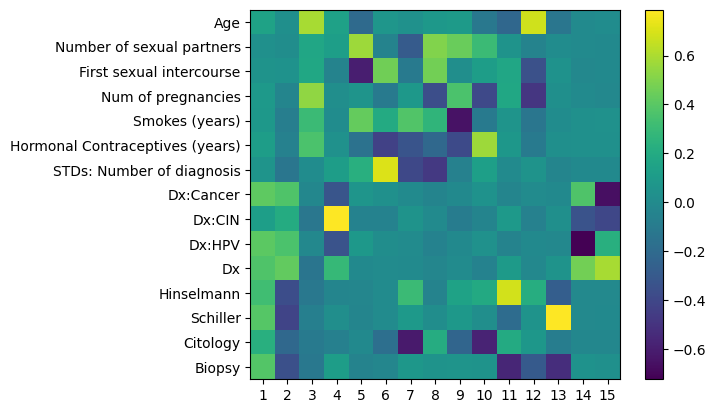

In [ ]:
## Representación de cada variable en las diferentes componentes
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(cuantitativas.columns)), cuantitativas.columns)
plt.xticks(range(len(cuantitativas.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

In [ ]:
#### Porcentaje de la varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente:')
print('')
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente:

[0.20162678 0.13902326 0.11970829 0.08472974 0.08345477 0.06727583
 0.06094665 0.05866532 0.05056087 0.05020273 0.02890123 0.02495267
 0.01563297 0.00892591 0.00539298]


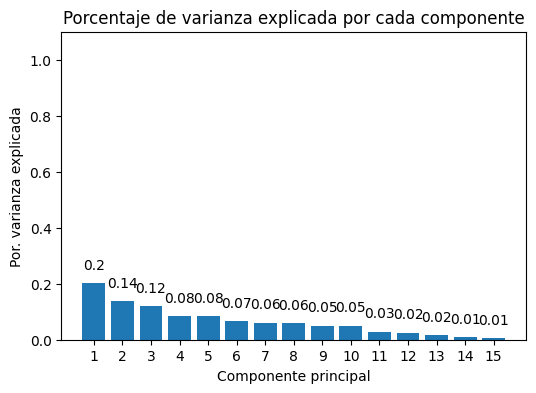

In [ ]:
#### Scree plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(cuantitativas.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Los primeros componentes explican la mayoría de la varianza y son los más informativos, mientras que los últimos componentes explican una cantidad menor de varianza y pueden tener menos relevancia en el análisis.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.20162678 0.34065004 0.46035833 0.54508807 0.62854284 0.69581867
 0.75676532 0.81543064 0.86599151 0.91619425 0.94509548 0.97004814
 0.98568111 0.99460702 1.        ]


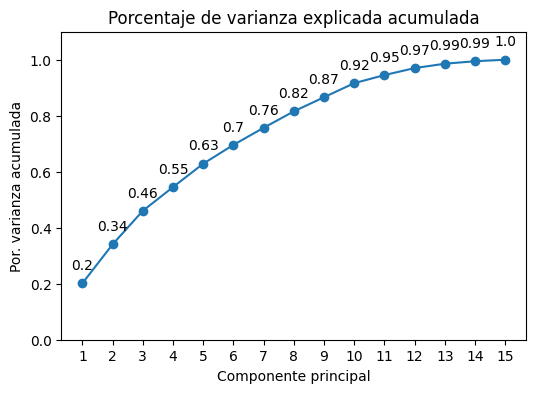

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(cuantitativas.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(cuantitativas.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Al utilizar todos los componentes principales (el 100% de varianza acumulada), se conserva la totalidad de la varianza original, lo que significa que no se pierde información en el proceso de reducción de dimensionalidad. Sin embargo, es posible que no todos los componentes sean igualmente informativos o relevantes para el análisis, esto se observa debido a que solo en los primeros 5 componentes principales se conserva más del 50% de varianza acumulada lo cual es cantidad significativa de la varianza original.

### Reglas de asociación

In [ ]:
categoricas = data.select_dtypes(include=['object', 'category'])
categoricas = categoricas.astype(object)
categoricas

,Smokes,Smokes (packs/year),Hormonal Contraceptives,IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
3,1.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
855,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
856,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?


In [ ]:
##transformar los datos

print(categoricas.shape)
# Se van a convertir los datos a una lista de listas
records = []

for i in range(0, 62):
    records.append([str(categoricas.values[i,j]) for j in range(0, 10)])
records

(858, 21)


[['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['1.0', '37.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['1.0', '3.4', '0.0', '1.0', '7.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '1.0', '1.0', '7.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['1.0', '2.8', '0.0', '?', '?', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '1.0', '1.0', '5.0', '0.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.

In [ ]:
# El mínimo de cobertura o soporte es 20% y el mínimo de confianza es 80%
reglas_asociacion = apriori(records,min_support=0.2, min_confidence = 0.8)
reglas = list(reglas_asociacion)

In [ ]:
print(len(reglas))

3


In [ ]:
def analyze_apriori(transactions, min_support, min_confidence):
    rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=1.0, min_length=2)
    rules = list(rules)

    rules_summary = []
    for rule in rules:
        for item in rule.ordered_statistics:
            rules_summary.append({
                "Base": ', '.join(item.items_base),
                "Add": ', '.join(item.items_add),
                "Support": rule.support,
                "Confidence": item.confidence,
                "Lift": item.lift
            })

    return pd.DataFrame(rules_summary)

# Probar con diferentes valores de soporte y confianza
support_confidence_combinations = [
    (0.1, 0.6),
    (0.1, 0.7),
    (0.05, 0.6),
    (0.05, 0.7)
]

for support, confidence in support_confidence_combinations:
    print(f"Probando con soporte={support} y confianza={confidence}")
    rules_df = analyze_apriori(records, min_support=support, min_confidence=confidence)
    print(rules_df)
    print("\n")

Probando con soporte=0.1 y confianza=0.6
  Base       Add   Support  Confidence  Lift
0            0.0  1.000000    1.000000   1.0
1            1.0  0.806452    0.806452   1.0
2       1.0, 0.0  0.806452    0.806452   1.0
3  0.0       1.0  0.806452    0.806452   1.0
4  1.0       0.0  0.806452    1.000000   1.0


Probando con soporte=0.1 y confianza=0.7
  Base       Add   Support  Confidence  Lift
0            0.0  1.000000    1.000000   1.0
1            1.0  0.806452    0.806452   1.0
2       1.0, 0.0  0.806452    0.806452   1.0
3  0.0       1.0  0.806452    0.806452   1.0
4  1.0       0.0  0.806452    1.000000   1.0


Probando con soporte=0.05 y confianza=0.6
       Base       Add   Support  Confidence  Lift
0                 0.0  1.000000    1.000000  1.00
1                 1.0  0.806452    0.806452  1.00
2            1.0, 0.0  0.806452    0.806452  1.00
3       0.0       1.0  0.806452    0.806452  1.00
4       1.0       0.0  0.806452    1.000000  1.00
5       2.0       0.0  0.064516 

In [ ]:
list(reglas)

[RelationRecord(items=frozenset({'0.0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'1.0'}), support=0.8064516129032258, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1.0'}), confidence=0.8064516129032258, lift=1.0)]),
 RelationRecord(items=frozenset({'0.0', '1.0'}), support=0.8064516129032258, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0.0', '1.0'}), confidence=0.8064516129032258, lift=1.0), OrderedStatistic(items_base=frozenset({'0.0'}), items_add=frozenset({'1.0'}), confidence=0.8064516129032258, lift=1.0), OrderedStatistic(items_base=frozenset({'1.0'}), items_add=frozenset({'0.0'}), confidence=1.0, lift=1.0)])]

Ya realizados los cálculos para las reglas de asociación, se osberva como tuvimos 3 reglas de asociación, es necesario comprender los indicadores de rendimiento de estas reglas. Para este caso tenemos solo 0 y 1 que indica si la persona contesto que no o que si a las preguntadas dadas.

Se obtiene el valor del soporte que indica la frecuencia relativa del itemset que contiene todos los items presentes en la regla,  se obtiene un soporte de 0.0.80645 para este regla; La confianza; mide que tan confiable es la suposición de las respuestas de las personas, se obtuvo una confianza de 1 , por lo que, para todos los que contestaron que no y que si y por último un lift de 1 lo que indica que no hay relación entre las respuestas.